In [17]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
X, y =  make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.05, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Выводим размеры выборки
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (1000, 2)
y.shape: (1000,)


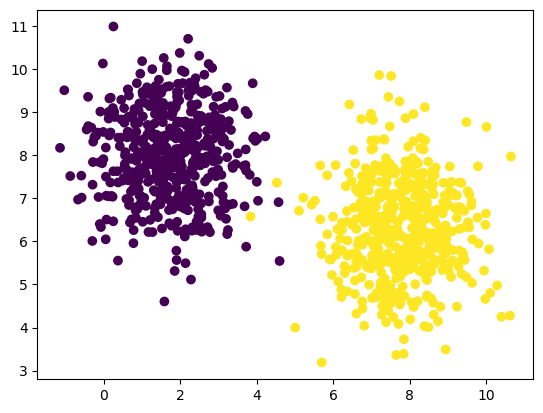

In [41]:
X1 = np.c_[np.ones((X.shape[0])),X]
plt.scatter(X1[:,1],X1[:,2],marker='o',c=y)
plt.show()

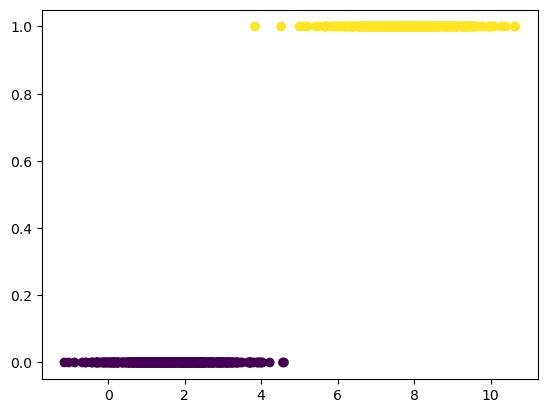

In [42]:
plt.scatter(X1[:,1],y,marker='o',c=y)
plt.show()

# Логистическая регрессия

Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу. \
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
<p style="text-align: center;"> $f(z) = \dfrac{1}{1 + e^{-z}}$ </p>

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида:

<p style="text-align: center;"> $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 + ... + w_mx_m}}$ </p>

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
<p style="text-align: center;"> $-\sum\limits_{i=1}^{n}(y_ilog(a_i) + (1 - y_i)log(1 - a_i))$ </p>
где $a_i = a(w, x_i)$

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)

$$cost = -y\log(a_\theta) - (1-y)\log(1-a_\theta)$$
Пусть: $A = -y\log(a_\theta), B = -(1-y)\log(1-a_\theta)$

Найдем производную $\frac{dA}{dw}$:
$$ \frac{dA}{dw} = -\frac{y}{a_\theta}\cdot\frac{da_\theta}{dz}\cdot \frac{dz}{dw}\ = - y\cdot x \cdot (1-a_\theta)$$
Найдем производную $\frac{dB}{dw}$:
$$\frac{dB}{dw} =  \frac{1 - y}{1 - a_\theta}\cdot\frac{da_\theta}{dz}\cdot \frac{dz}{dw}\ = a_\theta\cdot x \cdot (1-y)$$
Cложим $A+B$ и получим $\frac{dcost}{dw}$:
$$\frac{dcost}{dw} =  x(a_\theta -y) \cdot \frac{1}{n}$$
Для нахождения градиента (всех частных производных одновременно) перепишем формулу в векторной нотации:
$$\bigtriangledown cost = X^T(a_\theta - y)\cdot \frac{1}{n}$$

#### Задание №2. Напишите собственную логистическую регрессию

In [33]:
class MyLogRegression():
    
    def __init__(self):
        self.thetas = None
        self.loss_history = []
    
    def fit(self, X, y, num_iters=10000, alpha=0.01):
        X = np.insert(X, 0, 1, axis=1)
        self.thetas = np.zeros(X.shape[1])
        self.loss_history = []
        
        for i in range(num_iters):
            h = self.sigmoid(X @ self.thetas)
            cost = self.cost(h, y)
            
            gradient = self.gradient(X, y, h)
            self.thetas -= alpha * gradient
            
            self.loss_history.append(cost)
            
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        proba = self.sigmoid(X @ self.thetas)
        return np.round(proba), proba
    
    def cost(self, h, y):
        epsilon = 1e-5
        return (-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon)).mean()
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, h, y):
        epsilon = 1e-5
        return (-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon)).mean()
    
    def gradient(self, X, y, h):
        return (X.T @ (h - y)) / y.size

In [35]:
my_lr = MyLogRegression()
my_lr.fit(X_train, y_train)
y_pred = my_lr.predict(X_test)[0]

my_lr_acc = accuracy_score(y_test, y_pred)

#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

In [36]:
sk_lr = LogisticRegression()
sk_lr.fit(X_train, y_train)
y_pred = sk_lr.predict(X_test)

sk_lr_acc = accuracy_score(y_test, y_pred)

In [38]:
print("My implementation of Logistic Regression Accuracy:", my_lr_acc)
print("Scikit-learn Logistic Regression Accuracy:", sk_lr_acc)

My implementation of Logistic Regression Accuracy: 1.0
Scikit-learn Logistic Regression Accuracy: 1.0
